## 1. Import package and load data

In [34]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [5]:
# Merge data 12 months
path = 'D:/DA portfolio/Python/Python - Sales reporting/data/'
frames = []
for file in os.listdir(path):
    if file.endswith('.csv'):
        filepath = path + file
        frame = pd.read_csv(filepath)
        frames.append(frame)
        result = pd.concat(frames)

df = result
df.to_csv('annualSalesReport2019.csv',index=False)



## 2. Clean and preprocess data
### 2.1 Add 'month' column

In [6]:
df['Month']= df['Order Date'].str[0:2]
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01


In [23]:
print(set(df['Month']))

{'07', '08', '11', '12', '05', '03', '04', '01', '02', '06', '09', '10'}


### 2.2 Delete 'nan' and 'Or' values

In [22]:
df = df.dropna(how='all')
df  = df[df['Month'] != 'Or']

## 3. Reporting
### 3.1.	What was the best month for sales? How much was earned that month?


In [27]:
print(df['Quantity Ordered'].dtypes)
print(df['Price Each'].dtypes)

int8
float32


In [26]:
# Tranform data types column 'Quantity Ordered' and 'Price Each' to numberic
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'],downcast = 'integer')
df['Price Each'] = pd.to_numeric(df['Price Each'],downcast = 'float')

In [28]:
# Calculate Sales
df['Sales'] = df['Quantity Ordered']*df['Price Each']
sales_value = df.groupby(df['Month']).sum()['Sales']
sales_value = sales_value.reset_index()
sales_value.max()

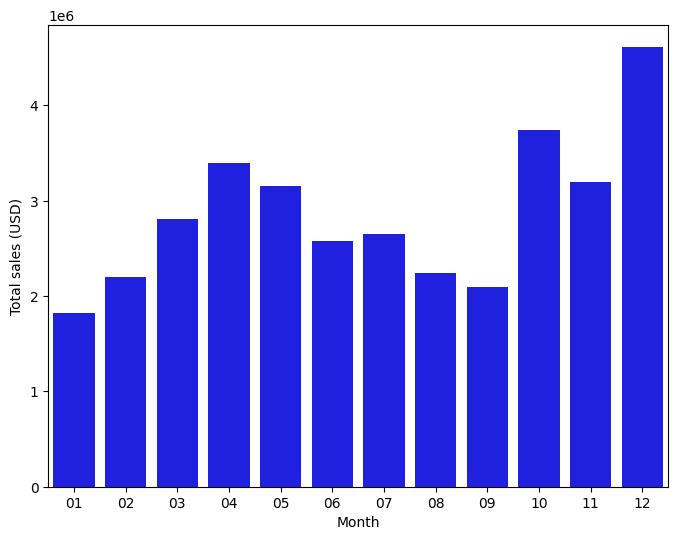

In [65]:
# Visualize
plt.figure(figsize = (8,6))
sns.barplot(data=sales_value, x= "Month", y="Sales", color = 'blue')
plt.xlabel("Month")
plt.ylabel("Total sales (USD)")
plt.show()

### 3.2 2.	What city has the best sales? 

In [57]:
city_split = lambda city_split: city_split.split(',')[1]
df['City'] = df['Purchase Address'].apply(city_split)

In [63]:
city = df.groupby(df['City']).sum()['Sales']
city = city.reset_index()
city

C:\Users\DELL.DESKTOP-1BP7V8J\AppData\Local\Temp\ipykernel_11688\323000077.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  city = df.groupby(df['City']).sum()['Sales']


,City,Sales
0,Atlanta,2795498.50
1,Austin,1819581.75
2,Boston,3661642.00
3,Dallas,2767975.50
4,Los Angeles,5452571.00
5,New York City,4664317.50
6,Portland,2320490.50
7,San Francisco,8262204.00
8,Seattle,2747755.50


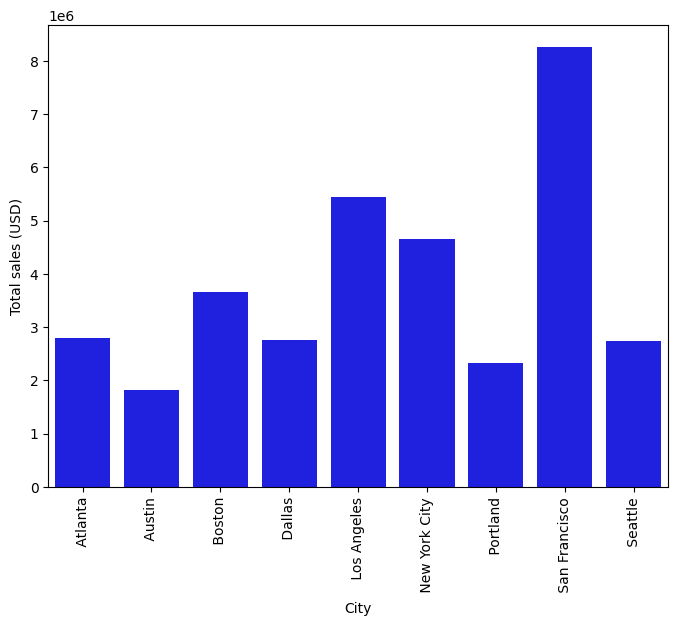

In [72]:
# Visualize
plt.figure(figsize = (8,6))
sns.barplot(data=city, x= "City", y="Sales", color = 'blue')
plt.xticks(rotation=90)
plt.xlabel("City")
plt.ylabel("Total sales (USD)")
plt.show()

### 3.3	What time we should display ads to maximum likelihood of customer’s buying product?

In [73]:
# Tranform dtype 'Order date' to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [ ]:
# Add column 'hours'
df['Hours'] = df['Order Date'].dt.hour

In [83]:
hours = df.groupby(df['Hours']).count()['Sales']
hours = hours.reset_index()

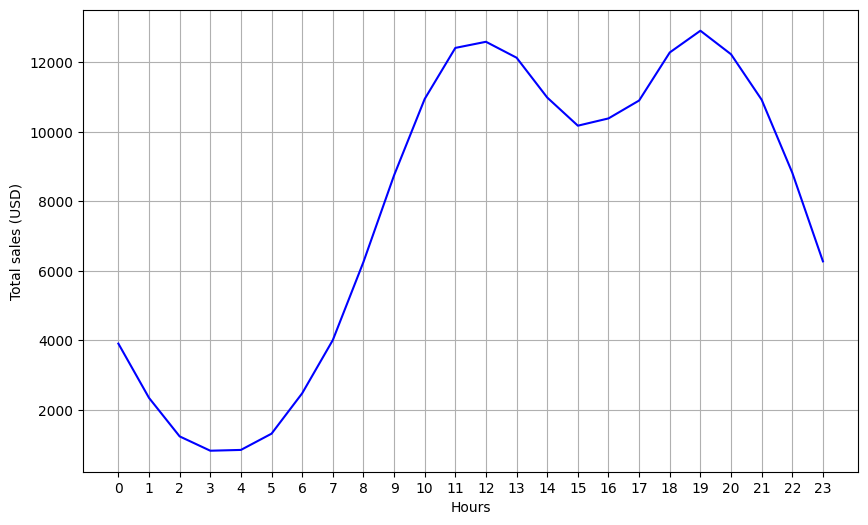

In [119]:
# Visualize
plt.figure(figsize = (10,6))
sns.lineplot(data=hours, x= "Hours", y="Sales", color = 'blue')
plt.grid()
plt.xticks(hours['Hours'])
plt.xlabel("Hours")
plt.ylabel("Total sales (USD)")
plt.show()

##### The peak order periods are 12pm and 19pm.

### 3.4 What products are most often sold together?

In [90]:
df_dup = df[df['Order ID'].duplicated(keep=False)]
df_dup.groupby('Order ID').agg({"Product":lambda x:list(x)}).reset_index()

In [97]:
# Top 10 Group of Products are most sold together 
df_dup['Product'].value_counts().head(10)

[iPhone, Lightning Charging Cable]                        882
[Google Phone, USB-C Charging Cable]                      856
[iPhone, Wired Headphones]                                361
[Vareebadd Phone, USB-C Charging Cable]                   312
[Google Phone, Wired Headphones]                          303
[iPhone, Apple Airpods Headphones]                        286
[Google Phone, Bose SoundSport Headphones]                161
[Vareebadd Phone, Wired Headphones]                       104
[Google Phone, USB-C Charging Cable, Wired Headphones]     77
[Vareebadd Phone, Bose SoundSport Headphones]              60
Name: Product, dtype: int64

### 3.5.	What product sold the most? Why ?

In [101]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hours
0,141234,iPhone,1,700.000000,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",01,700.000000,Boston,21
1,141235,Lightning Charging Cable,1,14.950000,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",01,14.950000,Portland,14
2,141236,Wired Headphones,2,11.990000,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",01,23.980000,San Francisco,13
3,141237,27in FHD Monitor,1,149.990005,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",01,149.990005,Los Angeles,20
4,141238,Wired Headphones,1,11.990000,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",01,11.990000,Austin,11


In [105]:
# Sales by product
product = df.groupby(df['Product']).sum()['Quantity Ordered']
product = product.reset_index()
product


C:\Users\DELL.DESKTOP-1BP7V8J\AppData\Local\Temp\ipykernel_11688\3506377458.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  product = df.groupby(df['Product']).sum()['Quantity Ordered']


,Product,Quantity Ordered
0,20in Monitor,4129
1,27in 4K Gaming Monitor,6244
2,27in FHD Monitor,7550
3,34in Ultrawide Monitor,6199
4,AA Batteries (4-pack),27635
5,AAA Batteries (4-pack),31017
6,Apple Airpods Headphones,15661
7,Bose SoundSport Headphones,13457
8,Flatscreen TV,4819
9,Google Phone,5532


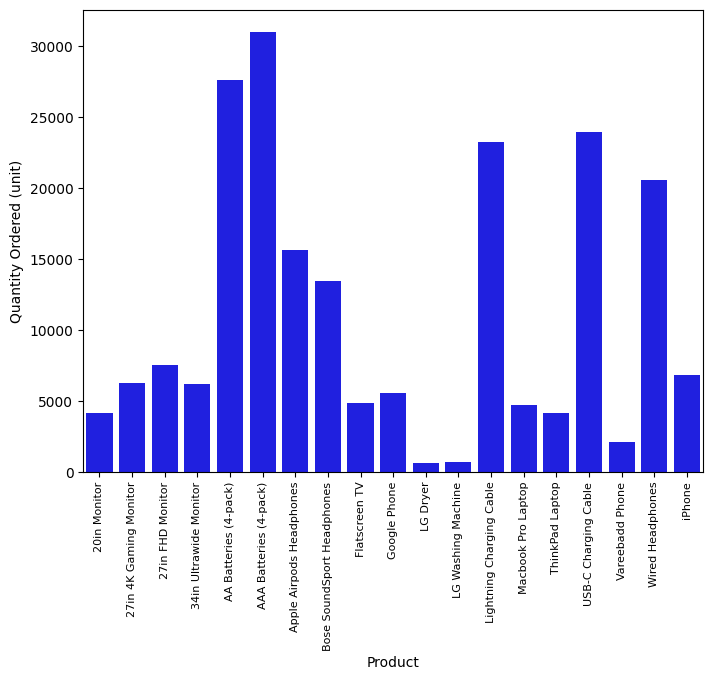

In [104]:
# Visualize
plt.figure(figsize = (8,6))
sns.barplot(data=product, x= "Product", y="Quantity Ordered", color = 'blue')
plt.xticks(rotation=90, size = 8)
plt.ylabel("Quantity Ordered (unit)")
plt.show()

##### According to the graph, AA Batteries (4-pack), AAA Batteries (4-pack)	are sold the most.

In [ ]:
price = df.groupby(df['Product']).mean()['Price Each']
price = price.reset_index()

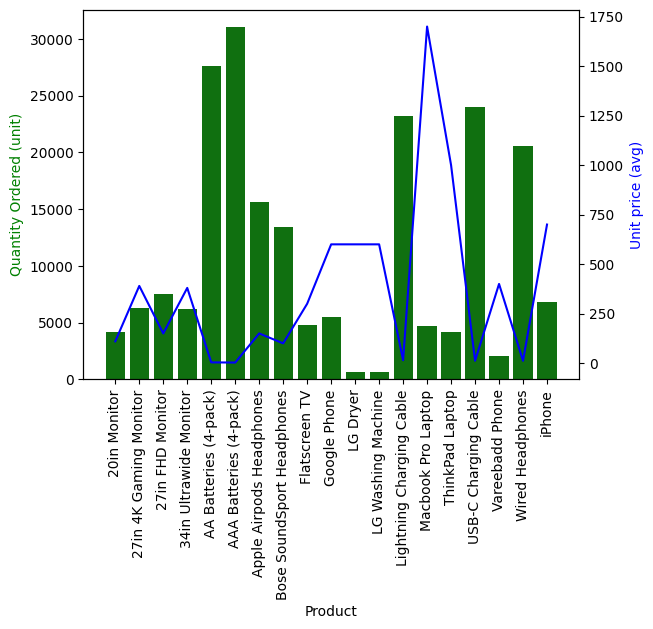

In [120]:
# Visualize add price value

fig, ax = plt.subplots()
sns.barplot(data=product, x= "Product", y="Quantity Ordered", color='green', ax=ax)
ax2 = ax.twinx()
sns.lineplot(data=price, x= "Product", y="Price Each", color='blue', markers=True, ax=ax2)

# replace helper axis with actual data
ax.set_xticklabels(product['Product'].values, rotation = 90)
ax.set_ylabel("Quantity Ordered (unit)",color='green')
ax2.set_ylabel ("Unit price (avg)",color='blue')
plt.show()

##### AA Batteries (4-pack) and AAA Batteries (4-pack) are sold the most, maybe due to the low price